In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score   
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.shape


(7691, 9)

In [3]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,0.0,3.0,1.0,4.0,3.0,9.740969,7.358831,1.0,2.0
1,0.0,2.0,1.0,4.0,8.0,9.680344,7.245655,1.0,2.0
2,0.0,2.0,1.0,4.0,25.0,9.903488,6.684612,1.0,2.0
3,0.0,2.0,1.0,4.0,8.0,9.546813,7.073270,0.0,2.0
4,0.0,1.0,1.0,1.0,8.0,8.853665,5.991465,0.0,1.0


In [4]:
print(data["bathroom"].value_counts())

bathroom
2.0    4261
1.0    2207
3.0    1223
Name: count, dtype: int64


data split

In [5]:
y = data['price']
X = data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

model training with random forest

In [6]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)


rf1.fit(X_train.values, y_train)



RandomForestRegressor(n_estimators=200, random_state=101)

In [7]:
rf1_pred = rf1.predict(X_test)
print(rf1_pred)


[9.31656709 9.38355887 8.83613807 ... 9.25783164 9.42740678 8.87376646]


c:\Users\mario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Running and checking the accuracy of the model

Random Forest Performance:

all features, No scaling:
MAE: 0.18810473267170322
RMSE: 0.2734495782593972
R2_Score:  0.7401779897266645


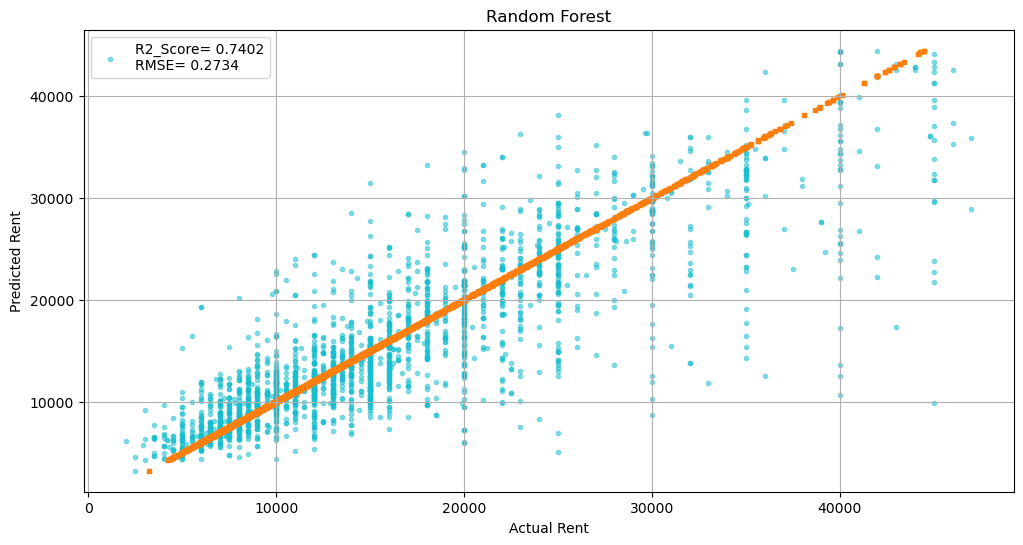

In [8]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))


pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Predicted_Rent'], pred['Predicted_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

In [9]:
score=rf1.score(X_test,y_test)
print(score)

0.7401779897266645


c:\Users\mario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## saving the model

In [10]:
filename='finalized_model.sav'
pickle.dump(rf1, open(filename, 'wb'))

In [11]:
"""print("Enter seller type: OWNER: 0, AGENT: 1, BUILDER: 2")
seller=float(input("enter code: "))
bedroom=float(input("enter number of bedroom(max=4): "))
print("Enter Layout type: RK: 0, BHK: 1")
layout=float(input("enter code: "))
print("Enter property type: Studio Apartment: 0, Independent House: 1, Independent Floor: 2, Villa: 3, Apartment: 4")
type=float(input("enter code: "))
print("Enter Locality:\n'Perungalathur': 0, 'Chromepet': 1, 'tambaram west': 2\n 'Ambattur': 3, 'Pallikaranai': 4, 'Kolathur': 5\n'Medavakkam': 6, 'Madipakkam': 7,'Perumbakkam': 9\n'Choolaimedu': 10, 'Perungudi': 11, 'Adambakam': 12\n 'Velachery': 13, 'Porur': 14,'Kotivakkam': 15\n'Sholinganallur': 16, 'Kodambakkam': 17, 'West Mambalam': 18\n'Thoraipakkam OMR': 19, 'Neelankarai': 20, 'Vadapalani': 21\n'Nungambakkam': 22, 'Thiruvanmiyur': 23\n'T Nagar': 24, 'Adyar': 25")
locality=float(input("enter code: "))
area=np.log1p(int(input("enter area: ")))
print("Enter furnishing type: Unfurnished: 0, Semi-Furnished: 1, Furnished: 2")
furnishing=float(input("enter code: "))
bathroom=float(input("enter number of bathroom(max=3): "))

vals=np.array([[seller,bedroom,layout,type,locality,area,furnishing,bathroom]])
print("Fair rent to expect:",np.exp(rf1.predict(vals)))"""

'print("Enter seller type: OWNER: 0, AGENT: 1, BUILDER: 2")\nseller=float(input("enter code: "))\nbedroom=float(input("enter number of bedroom(max=4): "))\nprint("Enter Layout type: RK: 0, BHK: 1")\nlayout=float(input("enter code: "))\nprint("Enter property type: Studio Apartment: 0, Independent House: 1, Independent Floor: 2, Villa: 3, Apartment: 4")\ntype=float(input("enter code: "))\nprint("Enter Locality:\n\'Perungalathur\': 0, \'Chromepet\': 1, \'tambaram west\': 2\n \'Ambattur\': 3, \'Pallikaranai\': 4, \'Kolathur\': 5\n\'Medavakkam\': 6, \'Madipakkam\': 7,\'Perumbakkam\': 9\n\'Choolaimedu\': 10, \'Perungudi\': 11, \'Adambakam\': 12\n \'Velachery\': 13, \'Porur\': 14,\'Kotivakkam\': 15\n\'Sholinganallur\': 16, \'Kodambakkam\': 17, \'West Mambalam\': 18\n\'Thoraipakkam OMR\': 19, \'Neelankarai\': 20, \'Vadapalani\': 21\n\'Nungambakkam\': 22, \'Thiruvanmiyur\': 23\n\'T Nagar\': 24, \'Adyar\': 25")\nlocality=float(input("enter code: "))\narea=np.log1p(int(input("enter area: ")))\npr